## SERIES TEMPORAIS COM FACEBOOK PROPHET

In [ ]:
from fbprophet import Prophet
import pandas as pd

In [10]:
dataset = pd.read_csv('/content/page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [11]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


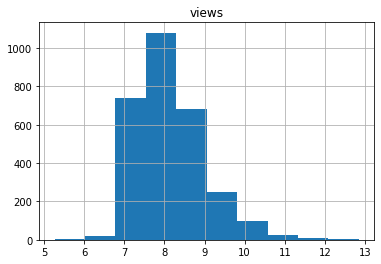

In [12]:
dataset.hist();

In [13]:
# DEFINICAO DE FORMATOS DE DATAS E VISUALIZACAO CONFORME EXIGE O ALGORITMO
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [14]:
# Ordenar em caso de base de dados desordenado
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


 # CONSTRUCAO DO MODELO E PREVISOES

In [15]:
model_fb = Prophet() # Variavel para treinamento
model_fb.fit(dataset) # Treinamento

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = model_fb.make_future_dataframe(periods=90) # CONSTRUCAO DE BASE DADOS PARA PREVISAO DE VIEWS
forecast = model_fb.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039047,8.228585,9.430801,8.039047,8.039047,0.803276,0.803276,0.803276,0.352278,0.352278,0.352278,0.450999,0.450999,0.450999,0.0,0.0,0.0,8.842323
1,2007-12-11,8.037505,8.003264,9.218501,8.037505,8.037505,0.553372,0.553372,0.553372,0.119619,0.119619,0.119619,0.433753,0.433753,0.433753,0.0,0.0,0.0,8.590877
2,2007-12-12,8.035963,7.765541,8.997443,8.035963,8.035963,0.350786,0.350786,0.350786,-0.066656,-0.066656,-0.066656,0.417443,0.417443,0.417443,0.0,0.0,0.0,8.386749
3,2007-12-13,8.034421,7.764561,8.969137,8.034421,8.034421,0.330255,0.330255,0.330255,-0.072256,-0.072256,-0.072256,0.402511,0.402511,0.402511,0.0,0.0,0.0,8.364676
4,2007-12-14,8.032879,7.727178,8.960319,8.032879,8.032879,0.319794,0.319794,0.319794,-0.069570,-0.069570,-0.069570,0.389363,0.389363,0.389363,0.0,0.0,0.0,8.352673


In [20]:
len(dataset), len(forecast) # COMPARACAO ENTRE A BASE ANTIGA E A CRIADA

(2905, 2995)

In [21]:
forecast.tail(90) # visualizacao das ultimas colunas de previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.560445,7.947928,9.203244,7.560445,7.560445,0.999976,0.999976,0.999976,-0.072256,-0.072256,-0.072256,1.072233,1.072233,1.072233,0.0,0.0,0.0,8.560421
2906,2016-01-22,7.559425,7.942871,9.260277,7.559425,7.559425,1.016987,1.016987,1.016987,-0.069570,-0.069570,-0.069570,1.086557,1.086557,1.086557,0.0,0.0,0.0,8.576412
2907,2016-01-23,7.558406,7.740762,8.908114,7.558406,7.558406,0.786727,0.786727,0.786727,-0.311697,-0.311697,-0.311697,1.098424,1.098424,1.098424,0.0,0.0,0.0,8.345133
2908,2016-01-24,7.557387,8.100206,9.349370,7.557387,7.557387,1.155721,1.155721,1.155721,0.048282,0.048282,0.048282,1.107439,1.107439,1.107439,0.0,0.0,0.0,8.713108
2909,2016-01-25,7.556367,8.440724,9.628337,7.556367,7.556367,1.465468,1.465468,1.465468,0.352278,0.352278,0.352278,1.113190,1.113190,1.113190,0.0,0.0,0.0,9.021835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.473797,6.286293,7.514142,7.449648,7.495053,-0.561064,-0.561064,-0.561064,-0.069570,-0.069570,-0.069570,-0.491495,-0.491495,-0.491495,0.0,0.0,0.0,6.912733
2991,2016-04-16,7.472777,6.084492,7.351012,7.448287,7.494596,-0.773100,-0.773100,-0.773100,-0.311697,-0.311697,-0.311697,-0.461403,-0.461403,-0.461403,0.0,0.0,0.0,6.699677
2992,2016-04-17,7.471758,6.399107,7.702217,7.445813,7.494058,-0.383429,-0.383429,-0.383429,0.048282,0.048282,0.048282,-0.431711,-0.431711,-0.431711,0.0,0.0,0.0,7.088329
2993,2016-04-18,7.470739,6.792405,8.052943,7.443721,7.493285,-0.050880,-0.050880,-0.050880,0.352278,0.352278,0.352278,-0.403158,-0.403158,-0.403158,0.0,0.0,0.0,7.419858


# Graficos de previsoes

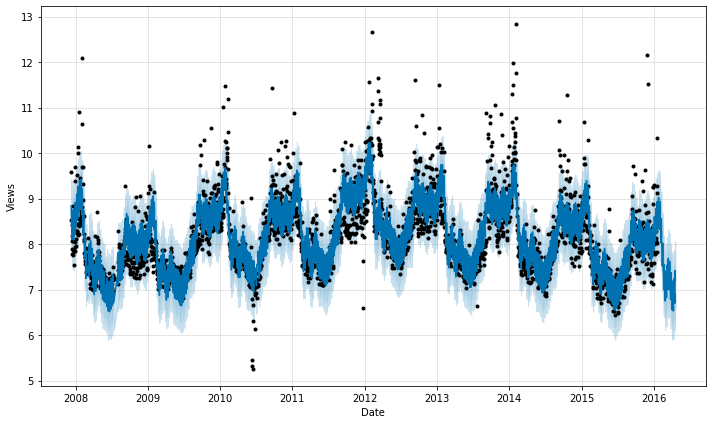

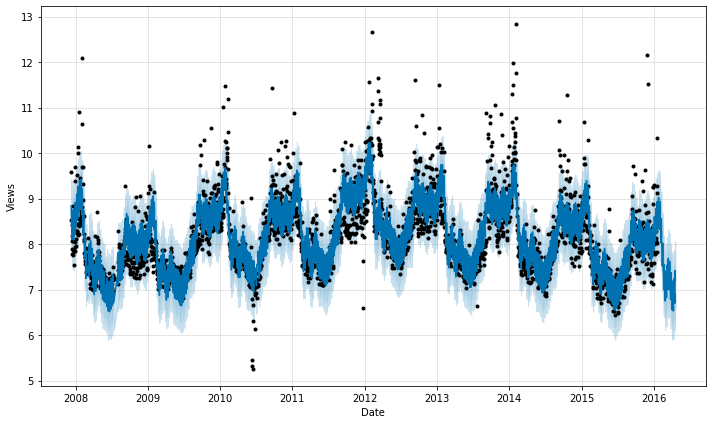

In [22]:
model_fb.plot(forecast, xlabel= 'Date', ylabel='Views') # OS PONTINHOS INDICAM AS VISUALIZACOES DO JOGADOR E NO FIM TEMOS AS PREVISOES

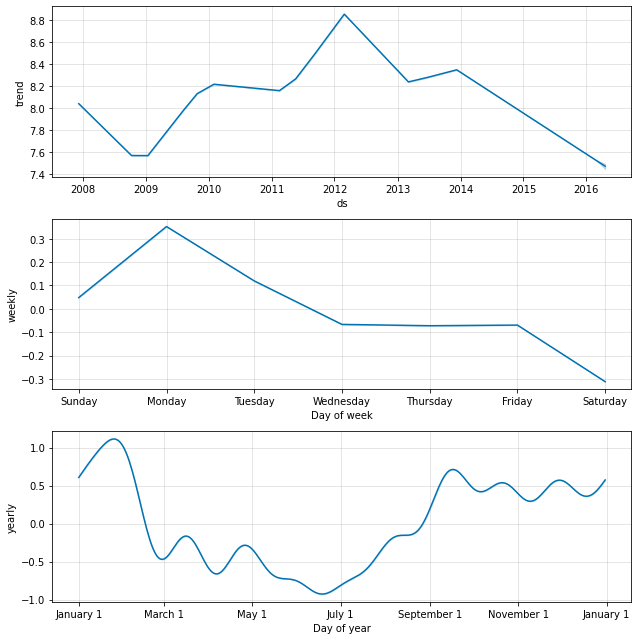

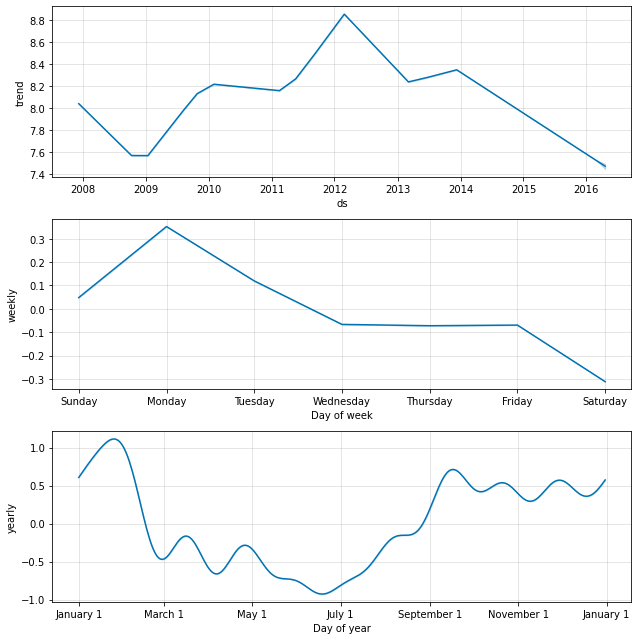

In [25]:
model_fb.plot_components(forecast)

In [27]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [29]:
plot_plotly(model_fb, forecast)

In [30]:
from fbprophet.plot import plot_components
plot_components_plotly(model_fb, forecast)